## ***LES EXECUTIONS DES GRAPHIQUES PEUVENT ÊTRES ASSEZ LONGUES***

#  1 - **REGRESSION **
**DATASET : DIABETE**

---

PARAMETRES 

-------------------------------------------------------------------------

n_estimators

max_depth

min_sample_split

min_sample_leaf

max_leaf_nodes

max_sample (bootstrap sample)

max_features


--------------------------------------------------------------------------

In [5]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
import statistics
import matplotlib.pyplot as plt
import pandas as pd
dataset = datasets.load_diabetes()
X = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
y = dataset.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

## ------------------- PARAMÈTRE 1 : **N_ESTIMATORS** -----------------------------


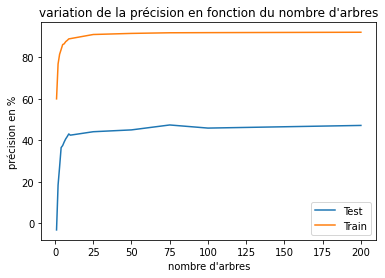

In [6]:
precisions_test=dict()
precisions_train=dict()
vals = [1,2,3,4,5,6,7,8,9,10,25,50,75,100,200]
for i in vals:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestRegressor(n_estimators=i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)

precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision en fonction du nombre d'arbres")
plt.xlabel("nombre d'arbres")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

## ------------------- PARAMÈTRE 2 : **MAX_DEPTH** -----------------------------



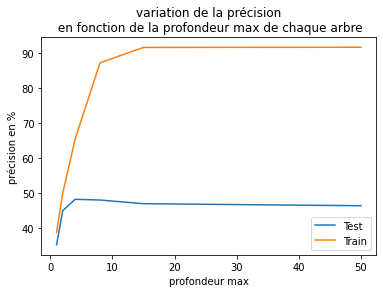

In [7]:
precisions_test=dict()
precisions_train=dict()
vals = [1, 2, 4, 8, 15, 50]
for i in vals:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestRegressor(n_estimators = 60, max_depth = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision\n en fonction de la profondeur max de chaque arbre")
plt.xlabel("profondeur max")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

## ------------------- PARAMÈTRE 4 : **MAX LEAF NODE** -----------------------------


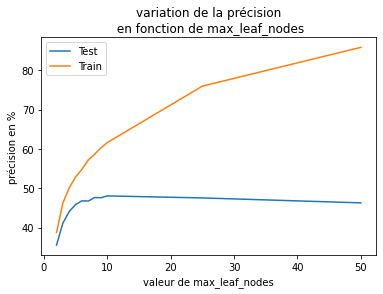

In [8]:
precisions_test=dict()
precisions_train=dict()
vals = [2,3,4,5,6,7,8,9,10,25,50]
for i in vals:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestRegressor(n_estimators = 35, max_depth = 62, max_leaf_nodes = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)

  
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision\n en fonction de max_leaf_nodes")
plt.xlabel("valeur de max_leaf_nodes")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

## ------------------- PARAMÈTRE 4 : **MAX SAMPLES** -----------------------------

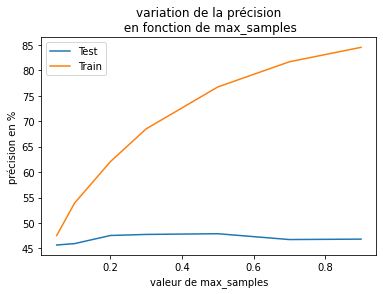

In [9]:
precisions_test=dict()
precisions_train=dict()
vals = [0.05,0.1,0.2,0.3,0.5,0.7,0.9]
for i in vals:
  precisions_test_i=[]
  precisions_train_i=[]
  for j in range(10):
    algo = RandomForestRegressor(n_estimators = 35, max_depth = 62, max_leaf_nodes = 50, max_samples = i)
    algo.fit(X_train,y_train)
    precisions_test_i.append(algo.score(X_test,y_test)*100)
    precisions_train_i.append(algo.score(X_train,y_train)*100)
  precisions_test[i] = statistics.mean(precisions_test_i)
  precisions_train[i] = statistics.mean(precisions_train_i)
  
precisions_test = precisions_test.items()
precisions_test = sorted(precisions_test) 
x1, y1 = zip(*precisions_test) 

precisions_train = precisions_train.items()
precisions_train = sorted(precisions_train) 
x2, y2 = zip(*precisions_train)

plt.title("variation de la précision\n en fonction de max_samples")
plt.xlabel("valeur de max_samples")
plt.ylabel("précision en %")
line1, = plt.plot(x1,y1,label="Test")
line2, = plt.plot(x2,y2,label="Train")
plt.legend(handles=[line1, line2])
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
import math

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
params = {'n_estimators' : [25, 30, 50, 70, 75, 80, 90, 100, 150, 200],
          'max_depth': [None, 10, 15, 20, 25, 50],
          'max_samples': [None, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6],
          'max_leaf_nodes': [None, 10, 20, 30, 40, 50]}

algo = GridSearchCV(RandomForestRegressor(), params, cv = 5)

algo.fit(X_train,y_train)
print(algo.best_params_)
print(f"précision test = {algo.score(X_test,y_test)}%")

RMSE = math.sqrt(mean_squared_error(y_test,algo.predict(X_test)))
print(f"RMSE = {RMSE:.2f}, moyenne des observation = {statistics.mean(y_test):.2f}")
print(f"RMSE correspond à {(RMSE*100) / statistics.mean(y_test):.2f}% des observations\n")
print(f"r2_score = {r2_score(y_test,algo.predict(X_test))*100:.2f}%")

{'max_depth': None, 'max_leaf_nodes': 10, 'max_samples': 0.2, 'n_estimators': 80}
précision test = 0.42747196983426605%
RMSE = 57.91, moyenne des observation = 145.34
RMSE correspond à 39.84% des observations

r2_score = 42.75%
